In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_digits
data = load_digits()

In [3]:
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
# information about our data set
dir(data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [7]:
print(data.DESCR)

# 8x8 = means for each image 8*8 = 64 pixels

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [9]:
data.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [12]:
data.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [16]:
data.frame # nothing

In [19]:
data.images[5] # 5th image pixels = 64 pixels

array([[ 0.,  0., 12., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 14., 16., 16., 14.,  0.,  0.],
       [ 0.,  0., 13., 16., 15., 10.,  1.,  0.],
       [ 0.,  0., 11., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  4.,  7., 16.,  7.,  0.],
       [ 0.,  0.,  0.,  0.,  4., 16.,  9.,  0.],
       [ 0.,  0.,  5.,  4., 12., 16.,  4.,  0.],
       [ 0.,  0.,  9., 16., 16., 10.,  0.,  0.]])

In [20]:
data.images[5].shape

(8, 8)

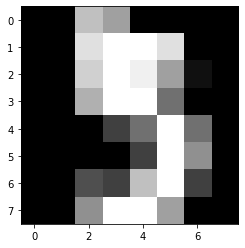

In [21]:
# to visualize

plt.gray()
plt.imshow(data.images[5])

In [26]:
data.target[5] # the value in 5th index

5

In [25]:
data.target_names # from 0 to 9

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [37]:
X = data.data

In [38]:
y = data.target

In [39]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [40]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [41]:
# just for seeing
a = pd.DataFrame(X, columns=data.feature_names)

In [42]:
a

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [44]:
b = pd.DataFrame(y)

In [45]:
b

,0
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


In [50]:
data.data.shape

(1797, 64)

In [47]:
from sklearn.model_selection import train_test_split

xtrain ,xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [48]:
len(xtrain)

1437

In [49]:
len(xtest)

360

In [51]:
1437 + 360

1797

### SVM

In [62]:
from sklearn.svm import SVC
model = SVC() # parameters = C, gamme = both needs to bo low for better accuracy lets, see,
                # default C = 1.0, gamma ="sacle"

In [63]:
model.fit(xtrain, ytrain)

SVC()

In [64]:
model.score(xtest, ytest)

0.9861111111111112

In [65]:
predicted = model.predict(xtest)

In [66]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [67]:
accuracy_score(ytest, predicted)

0.9861111111111112

In [68]:
confusion_matrix(ytest, predicted)

array([[31,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 29,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 46,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 33,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 40]], dtype=int64)

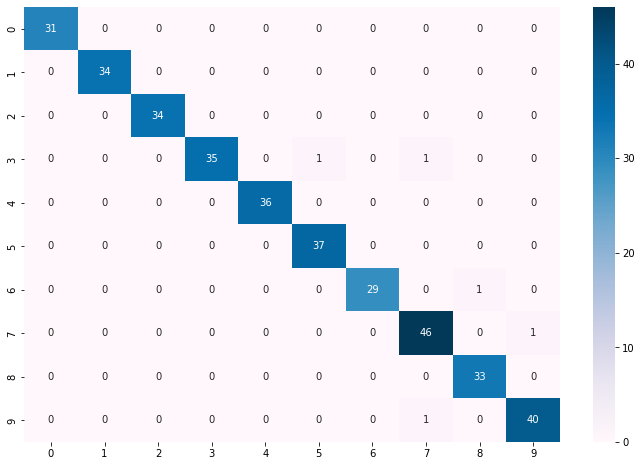

In [69]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(ytest, predicted), annot= True, cmap="PuBu")
plt.show()

In [70]:
print(classification_report(ytest, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        34
           3       1.00      0.95      0.97        37
           4       1.00      1.00      1.00        36
           5       0.97      1.00      0.99        37
           6       1.00      0.97      0.98        30
           7       0.96      0.98      0.97        47
           8       0.97      1.00      0.99        33
           9       0.98      0.98      0.98        41

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



### Checking

In [83]:
model.predict(xtest[:5])

array([7, 3, 5, 2, 7])

In [84]:
ytest[:5]

array([7, 3, 5, 2, 7])

### providing values to C and Gamma

In [72]:
# to check C and gamma , u have do to gridsearch cv
parameter = {'C':[0.1,10,100,150],'gamma':[0.1,0.001,0.0001,0.00001,0.000001]}

In [73]:
model__C_gamma = SVC()

In [74]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator=model__C_gamma, param_grid=parameter,cv = 3)

In [75]:
gs.fit(X,y)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 10, 100, 150],
                         'gamma': [0.1, 0.001, 0.0001, 1e-05, 1e-06]})

In [76]:
gs.best_params_

{'C': 10, 'gamma': 0.001}

In [77]:
model__C_gamma = SVC(C=10, gamma=0.001)

In [78]:
model__C_gamma.fit(xtrain,ytrain)

SVC(C=10, gamma=0.001)

In [79]:
model__C_gamma.score(xtest, ytest)

0.9861111111111112

In [80]:
# same score I am getting

### chceking

In [81]:
model__C_gamma.predict(xtest[:5])

array([7, 3, 5, 2, 7])

In [82]:
ytest[:5] 

array([7, 3, 5, 2, 7])

### Using Kernels

In [103]:
model_kernal = SVC(kernel='rbf') # default = rbf

In [104]:
model_kernal.fit(xtrain, ytrain)

SVC()

In [105]:
model_kernal.score(xtest, ytest)

0.9861111111111112

In [106]:
# model_kernal.predict_proba([xtest[2]])
# to do this mention probability = True here, model_kernal = SVC(kernel='rbf')

In [107]:
3.24043600e-03

0.003240436

In [108]:
1.43057817e-03, 1.30826969e-03, 3.24043600e-03, 2.39082472e-03,1.96384343e-03, 9.78163979e-01, 8.73638615e-04, 3.09076778e-03, 3.97253318e-03, 3.56512903e-03

(0.00143057817,
 0.00130826969,
 0.003240436,
 0.00239082472,
 0.00196384343,
 0.978163979,
 0.000873638615,
 0.00309076778,
 0.00397253318,
 0.00356512903)

In [109]:
ytest[2]

5

In [110]:
confusion_matrix(ytest, predicted)

array([[31,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 29,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 46,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 33,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 40]], dtype=int64)

### kernel = 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'

In [113]:
model_poly = SVC(kernel="poly")

In [114]:
model_poly.fit(xtrain, ytrain)
model_poly.score(xtest, ytest)

0.9888888888888889

In [115]:
# linear
model_linear = SVC(kernel="linear")
model_linear.fit(xtrain, ytrain)
model_linear.score(xtest, ytest)

0.9666666666666667

In [116]:
# sigmoid
model_sigmoid = SVC(kernel="sigmoid")
model_sigmoid.fit(xtrain, ytrain)
model_sigmoid.score(xtest, ytest)

0.9

In [118]:
# # precomputed
# model_precomputed = SVC(kernel="precomputed")
# model_precomputed.fit(xtrain, ytrain)
# model_precomputed.score(xtest, ytest)